In [1]:
from json import JSONDecodeError
import json
from src.utils.model_utils import *
from src.utils.output_formatter import *
from nervaluate import Evaluator

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm

In [2]:
tokenizer = get_base_tokenizer()

In [3]:
sentences = []
true_responses = []

In [4]:
with open(load_config().get("test_dataset_path"), 'r') as file:
    testing_data = json.load(file)

for item in testing_data:
    if 'user' not in item or 'assistant' not in item:
        print("problem with item:", item)
    sentences.append(item['user'])
    true_responses.append(transform_to_prodigy(item['user'], item['assistant']))

## Generating Results on Testing Dataset

In [5]:
invalid_indices = set()

Ensuring reproducible results:

In [6]:
fix_seed()

### Responses From Base Model

In [12]:
base_model = get_base_model()

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [14]:
generated_responses_base = []
for sentence in tqdm(sentences):
    generated_responses_base.append(generate_response(sentence, base_model, tokenizer))

So we can re-use the generated responses after restarting the notebook:

In [6]:
store_results(generated_responses_base, "../assets/generation_output/base_model.txt", do_backup=True)

In [8]:
generated_responses_base = load_results("../assets/generation_output/base_model.txt")

In [10]:
invalid_json_format = 0
invalid_key = 0
pred_responses_base = []
for i in range(len(generated_responses_base)):
    predicted = []
    try:
        predicted = transform_to_prodigy(sentences[i], generated_responses_base[i])
    except (JSONDecodeError, KeyError) as err:
        if isinstance(err, KeyError):
            invalid_key += 1
        else:
            invalid_json_format += 1
        invalid_indices.add(i)
    pred_responses_base.append(predicted)

print(f"Invalid format: {invalid_json_format + invalid_key} out of {len(generated_responses_base)} times ({invalid_json_format} JSONDecodeError, {invalid_key} KeyError)")

Invalid format: 665 out of 2422 times (610 JSONDecodeError, 55 KeyError)


### Responses From Fine-tuned Model

In [ ]:
finetuned_model = get_finetuned_model("phi3mini")

In [ ]:
generated_responses_finetuned = []
for sentence in tqdm(sentences):
    generated_responses_finetuned.append(generate_response(sentence, finetuned_model, tokenizer))

In [15]:
store_results(generated_responses_finetuned, '../assets/generation_output/finetuned_phi3.txt', do_backup=True)

In [11]:
generated_responses_finetuned = load_results('../assets/generation_output/finetuned_phi3.txt')

In [12]:
invalid_json_format = 0
invalid_key = 0
pred_responses_finetuned = []
for i in range(len(generated_responses_finetuned)):
    predicted = []
    try:
        predicted = transform_to_prodigy(sentences[i], generated_responses_finetuned[i])
    except (JSONDecodeError, KeyError) as err:
        if isinstance(err, KeyError):
            invalid_key += 1
        else:
            invalid_json_format += 1
        invalid_indices.add(i)
    pred_responses_finetuned.append(predicted)
print(f"Invalid format: {invalid_json_format + invalid_key} out of {len(generated_responses_finetuned)} times ({invalid_json_format} JSONDecodeError, {invalid_key} KeyError)")

Invalid format: 1 out of 2422 times (0 JSONDecodeError, 1 KeyError)


### Responses From Base NuExtract Model

In [16]:
nuextract_config = load_config("nuextract_config.json")

In [23]:
base_nuextract = get_base_model(nuextract_config.get("model"))

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
generated_responses_base_nuextract = []
for sentence in tqdm(sentences):
    generated_responses_base_nuextract.append(generate_response(sentence, base_nuextract, tokenizer, nuextract_config.get("system_prompt")))

In [25]:
store_results(generated_responses_base_nuextract, "../assets/generation_output/base_nuextract.txt", do_backup=True)

In [13]:
generated_responses_base_nuextract = load_results("../assets/generation_output/base_nuextract.txt")

In [14]:
invalid_json_format = 0
invalid_key = 0
pred_responses_base_nuextract = []
for i in range(len(generated_responses_base_nuextract)):
    predicted = []
    try:
        fixed_sentence = generated_responses_base_nuextract[i].split("\n")[0]
        default_format_sentence = numind_to_default(fixed_sentence)
        predicted = transform_to_prodigy(sentences[i], default_format_sentence)
    except (JSONDecodeError, AttributeError, KeyError) as err:
        if isinstance(err, KeyError):
            invalid_key += 1
        else:
            invalid_json_format += 1
        invalid_indices.add(i)
    pred_responses_base_nuextract.append(predicted)
print(f"Invalid format: {invalid_json_format + invalid_key} out of {len(generated_responses_base_nuextract)} times ({invalid_json_format} JSONDecodeError, {invalid_key} KeyError)")

Invalid format: 275 out of 2422 times (275 JSONDecodeError, 0 KeyError)


### Responses From Finetuned NuExtract Model

In [ ]:
finetuned_nuextract = get_finetuned_model("nuextract")

In [ ]:
generated_responses_ft_nuextract = []
for sentence in tqdm(sentences):
    generated_responses_ft_nuextract.append(generate_response(sentence, finetuned_nuextract, tokenizer, nuextract_config.get("system_prompt")))

In [10]:
store_results(generated_responses_ft_nuextract, "../assets/generation_output/finetuned_nuextract.txt", do_backup=True)

In [15]:
generated_responses_ft_nuextract = load_results("../assets/generation_output/finetuned_nuextract.txt")

In [16]:
invalid_json_format = 0
invalid_key = 0
pred_responses_ft_nuextract = []
for i in range(len(generated_responses_ft_nuextract)):
    predicted = []
    try:
        fixed_sentence = generated_responses_ft_nuextract[i].split("\n")[0]
        default_format_sentence = numind_to_default(fixed_sentence)
        predicted = transform_to_prodigy(sentences[i], default_format_sentence)
    except (JSONDecodeError, AttributeError, KeyError) as err:
        if isinstance(err, KeyError):
            invalid_key += 1
        else:
            invalid_json_format += 1
        invalid_indices.add(i)
    pred_responses_ft_nuextract.append(predicted)

print(f"Invalid format: {invalid_json_format + invalid_key} out of {len(generated_responses_ft_nuextract)} times ({invalid_json_format} JSONDecodeError, {invalid_key} KeyError)")

Invalid format: 325 out of 2422 times (325 JSONDecodeError, 0 KeyError)


### Evaluating Phi-3.5 mini to compare against Nuextract which is based on it

In [ ]:
finetuned_phi35 = get_finetuned_model("phi35")

In [ ]:
generated_responses_phi35 = []
for sentence in tqdm(sentences):
    generated_responses_phi35.append(generate_response(sentence, finetuned_phi35, tokenizer))

In [ ]:
store_results(generated_responses_phi35, "../assets/generation_output/finetuned_phi35.txt", do_backup=True)

In [17]:
generated_responses_phi35 = load_results("../assets/generation_output/finetuned_phi35.txt")

In [18]:
invalid_json_format = 0
invalid_key = 0
pred_responses_phi35 = []
for i in range(len(generated_responses_phi35)):
    predicted = []
    try:
        predicted = transform_to_prodigy(sentences[i], generated_responses_phi35[i])
    except (JSONDecodeError, KeyError) as err:
        if isinstance(err, KeyError):
            invalid_key += 1
        else:
            invalid_json_format += 1
        invalid_indices.add(i)
    pred_responses_phi35.append(predicted)
print(f"Invalid format: {invalid_json_format + invalid_key} out of {len(generated_responses_phi35)} times ({invalid_json_format} JSONDecodeError, {invalid_key} KeyError)")

Invalid format: 1 out of 2422 times (1 JSONDecodeError, 0 KeyError)


### Responses From OpenAI Model

In [8]:
generated_responses_openai = []
for sentence in tqdm(sentences):
    generated_responses_openai.append(generate_openai(sentence), model_name="gpt-4o-mini", provider="litellm")
    # claude-3

In [7]:
store_results(generated_responses_openai, "../assets/generation_output/openai.txt", do_backup=True)

In [19]:
generated_responses_openai = load_results("../assets/generation_output/openai.txt")

In [20]:
invalid_json_format = 0
invalid_key = 0
pred_responses_openai = []
for i in range(len(generated_responses_openai)):
    predicted = []
    try:
        predicted = transform_to_prodigy(sentences[i], generated_responses_openai[i])
    except (JSONDecodeError, KeyError) as err:
        if isinstance(err, KeyError):
            invalid_key += 1
        else:
            invalid_json_format += 1
        invalid_indices.add(i)
    pred_responses_openai.append(predicted)

print(f"Invalid format: {invalid_json_format + invalid_key} out of {len(generated_responses_openai)} times ({invalid_json_format} JSONDecodeError, {invalid_key} KeyError)")

Invalid format: 0 out of 2422 times (0 JSONDecodeError, 0 KeyError)


### Responses from Deepseek V3

In [5]:
generated_responses_deepseek = []
at = 0
for sentence in tqdm(sentences):
    at += 1
    generated_responses_deepseek.append(generate_openai(sentence, model_name="deepseek-chat", provider="deepseek"))
    if at % 100 == 0:
        with open(f'generation_output/openai{at}.txt', 'w') as file:
            file.write("\n$SEP$\n".join(generated_responses_deepseek))

In [6]:
store_results(generated_responses_deepseek, "../assets/generation_output/deepseek.txt", do_backup=True)

In [21]:
generated_responses_deepseek = load_results("../assets/generation_output/deepseek.txt")

In [22]:
invalid_json_format = 0
invalid_key = 0
pred_responses_deepseek = []
for i in range(len(generated_responses_deepseek)):
    predicted = []
    try:
        predicted = transform_to_prodigy(sentences[i], generated_responses_deepseek[i])
    except (JSONDecodeError, KeyError) as err:
        if isinstance(err, KeyError):
            invalid_key += 1
        else:
            invalid_json_format += 1
        invalid_indices.add(i)
    pred_responses_deepseek.append(predicted)

print(f"Invalid format: {invalid_json_format + invalid_key} out of {len(generated_responses_deepseek)} times ({invalid_json_format} JSONDecodeError, {invalid_key} KeyError)")

Invalid format: 4 out of 2422 times (4 JSONDecodeError, 0 KeyError)


### Separate variables for valid responses
Removing faulty data to better understand generating logic

In [23]:
cleaned_base_responses, cleaned_finetuned_responses, cleaned_nuextract_responses, cleaned_nuextract_ft_responses, cleaned_phi35_responses, cleaned_openai_responses, cleaned_deepseek_responses, cleaned_true_responses = [], [], [], [], [], [], [], []

for index in range(len(true_responses)):
    if index in invalid_indices:
        continue
    cleaned_base_responses.append(pred_responses_base[index])
    cleaned_finetuned_responses.append(pred_responses_finetuned[index])
    cleaned_nuextract_responses.append(pred_responses_base_nuextract[index])
    cleaned_nuextract_ft_responses.append(pred_responses_ft_nuextract[index])
    cleaned_phi35_responses.append(pred_responses_phi35[index])
    cleaned_openai_responses.append(pred_responses_openai[index])
    cleaned_deepseek_responses.append(pred_responses_deepseek[index])
    cleaned_true_responses.append(true_responses[index])

### Manual Evaluation

From previous cells, we can calculate how often the model generates an invalid response

In [24]:
print(f"Phi-3 Mini:           \t{round(665/2422*100,3)}%\t(665 out of 2422)")
print(f"Fine-tuned Phi-3 Mini:\t{round(1/2422*100,3)}%\t(1 out of 2422)")
print(f"NuExtract 1.5:        \t{round(275/2422*100,3)}%\t(275 out of 2422)")
print(f"Fine-tuned NuExtract: \t{round(325/2422*100,3)}%\t(325 out of 2422)")
print(f"Fine-tunedPhi-3.5:    \t{round(1/2422*100,3)}%\t(1 out of 2422)")
print(f"GPT-4o mini:          \t0%\t\t(0 out of 2422)")
print(f"Deepseek V3:          \t{round(4/2422*100,3)}%\t(4 out of 2422)")

Phi-3 Mini:           	27.457%	(665 out of 2422)
Fine-tuned Phi-3 Mini:	0.041%	(1 out of 2422)
NuExtract 1.5:        	11.354%	(275 out of 2422)
Fine-tuned NuExtract: 	13.419%	(325 out of 2422)
Fine-tunedPhi-3.5:    	0.041%	(1 out of 2422)
GPT-4o mini:          	0%		(0 out of 2422)
Deepseek V3:          	0.165%	(4 out of 2422)


We can also draw conclusions from how many entities each model predicted. We will not consider the inputs that received an invalid response from either of the models (similar to removing rows with null values)

In [25]:
print(f"Phi-3 Mini:           \t{sum(len(x) for x in cleaned_base_responses)}")
print(f"Fine-tuned Phi-3 Mini:\t{sum(len(x) for x in cleaned_finetuned_responses)}")
print(f"NuExtract 1.5:        \t{sum(len(x) for x in cleaned_nuextract_responses)}")
print(f"Fine-tuned NuExtract: \t{sum(len(x) for x in cleaned_nuextract_ft_responses)}")
print(f"Fine-tuned Phi-3.5:   \t{sum(len(x) for x in cleaned_phi35_responses)}")
print(f"GPT-4o mini:          \t{sum(len(x) for x in cleaned_openai_responses)}")
print(f"Deepseek V3:          \t{sum(len(x) for x in cleaned_deepseek_responses)}")
print(f"True amount:          \t{sum(len(x) for x in cleaned_true_responses)}")

Phi-3 Mini:           	6522
Fine-tuned Phi-3 Mini:	6068
NuExtract 1.5:        	4381
Fine-tuned NuExtract: 	5322
Fine-tuned Phi-3.5:   	5980
GPT-4o mini:          	4824
Deepseek V3:          	3664
True amount:          	5974


We can see that the base Phi-3 Mini model greatly overestimated what was considered an entity while the larger models on the contrary underestimated it.

### NERvaluate evaluation

#### Evaluating all responses

In [26]:
evaluator = Evaluator(true_responses, pred_responses_base, tags=['Disease', 'Chemical'])
base_results = evaluator.evaluate()[0]
evaluator = Evaluator(true_responses, pred_responses_finetuned, tags=['Disease', 'Chemical'])
finetuned_results = evaluator.evaluate()[0]
evaluator = Evaluator(true_responses, pred_responses_base_nuextract, tags=['Disease', 'Chemical'])
nuextract_results = evaluator.evaluate()[0]
evaluator = Evaluator(true_responses, pred_responses_ft_nuextract, tags=['Disease', 'Chemical'])
nuextract_ft_results = evaluator.evaluate()[0]
evaluator = Evaluator(true_responses, pred_responses_phi35, tags=['Disease', 'Chemical'])
phi35_results = evaluator.evaluate()[0]
evaluator = Evaluator(true_responses, pred_responses_openai, tags=['Disease', 'Chemical'])
openai_results = evaluator.evaluate()[0]
evaluator = Evaluator(true_responses, pred_responses_deepseek, tags=['Disease', 'Chemical'])
deepseek_results = evaluator.evaluate()[0]

In [27]:
# Prepare data in the desired format
data = []

# Iterate over each model and each metric type within the model
for model_name, model_data in zip(
    ["Base", "Fine-tuned", "NuExtract", "Fine-tuned NuExtract", "Fine-tuned Phi 3.5", "DeepSeek", "OpenAI"],
    [base_results, finetuned_results, nuextract_results, nuextract_ft_results, phi35_results, deepseek_results, openai_results]
):
    for metric, values in model_data.items():
        row = [model_name, metric] + list(values.values())
        data.append(row)

columns = ["Model", "Schema"] + list(base_results["ent_type"].keys())

df = pd.DataFrame(data, columns=columns)
# improve readability
df["Model"] = df["Model"].mask(df["Model"].duplicated(), "")
df.set_index(["Model", "Schema"], inplace=True)
df[["precision", "recall", "f1"]] = df[["precision", "recall", "f1"]].round(3)
# misleading for our purpose
df.drop(columns=['possible', 'actual'], inplace=True)
df


correct  incorrect  partial  missed  spurious  \
Model                Schema                                                    
Base                 ent_type     5285        209        0    4337      2692   
                     partial      4492          0     1002    4337      2692   
                     strict       4415       1079        0    4337      2692   
                     exact        4492       1002        0    4337      2692   
Fine-tuned           ent_type     8959         54        0     816       963   
                     partial      8413          0      600     816       963   
                     strict       8394        619        0     816       963   
                     exact        8413        600        0     816       963   
NuExtract            ent_type     5401        107        0    4298      1045   
                     partial      4488          0     1020    4298      1045   
                     strict       4470       1038        0    4298      1045   
                     exact        4488       1020        0    4298      1045   
Fine-tuned NuExtract ent_type     6353        939        0    2534       635   
                     partial      6696          0      596    2534       635   
                     strict       5900       1392        0    2534       635   
                     exact        6696        596        0    2534       635   
Fine-tuned Phi 3.5   ent_type     8866         63        0     901       951   
                     partial      8350          0      579     901       951   
                     strict       8322        607        0     901       951   
                     exact        8350        579        0     901       951   
DeepSeek             ent_type     5382         46        0    4381       256   
                     partial      4972          0      456    4381       256   
                     strict       4968        460        0    4381       256   
                     exact        4972        456        0    4381       256   
OpenAI               ent_type     6825         72        0    2917       913   
                     partial      6196          0      701    2917       913   
                     strict       6178        719        0    2917       913   
                     exact        6196        701        0    2917       913   

                               precision  recall     f1  
Model                Schema                              
Base                 ent_type      0.646   0.538  0.587  
                     partial       0.610   0.508  0.554  
                     strict        0.539   0.449  0.490  
                     exact         0.549   0.457  0.499  
Fine-tuned           ent_type      0.898   0.911  0.905  
                     partial       0.873   0.886  0.880  
                     strict        0.841   0.854  0.848  
                     exact         0.843   0.856  0.850  
NuExtract            ent_type      0.824   0.551  0.660  
                     partial       0.763   0.510  0.611  
                     strict        0.682   0.456  0.546  
                     exact         0.685   0.458  0.549  
Fine-tuned NuExtract ent_type      0.801   0.647  0.716  
                     partial       0.882   0.712  0.788  
                     strict        0.744   0.600  0.665  
                     exact         0.845   0.681  0.754  
Fine-tuned Phi 3.5   ent_type      0.897   0.902  0.900  
                     partial       0.874   0.879  0.877  
                     strict        0.842   0.847  0.844  
                     exact         0.845   0.849  0.847  
DeepSeek             ent_type      0.947   0.549  0.695  
                     partial       0.915   0.530  0.671  
                     strict        0.874   0.506  0.641  
                     exact         0.875   0.507  0.642  
OpenAI               ent_type      0.874   0.695  0.775  
                     partial       0.838   0.667  0.743  
      

In [64]:
def plot_for_schema(metric_name: str,
                    _base_results=base_results,
                    _finetuned_results=finetuned_results,
                    _nuextract_results=nuextract_results,
                    _nuextract_ft_results=nuextract_ft_results,
                    _phi35results=phi35_results,
                    _deepseek_results=deepseek_results,
                    _openai_results=openai_results):

    data = {
        "Schema": ["ent_type", "partial", "exact", "strict"],
        "Base Model": [_base_results[schema][metric_name] for schema in _base_results.keys()],
        "Fine-Tuned Model": [_finetuned_results[schema][metric_name] for schema in _finetuned_results.keys()],
        "NuExtract Model": [_nuextract_results[schema][metric_name] for schema in _nuextract_results.keys()],
        "Fine-tuned NuExtract Model": [_nuextract_ft_results[schema][metric_name] for schema in _nuextract_ft_results.keys()],
        "Fine-tuned Phi 3.5": [_phi35results[schema][metric_name] for schema in _phi35results.keys()],
        "Deepseek V3": [_deepseek_results[schema][metric_name] for schema in _deepseek_results.keys()],
        "GPT-4o mini": [_openai_results[schema][metric_name] for schema in _openai_results.keys()],
    }

    df = pd.DataFrame(data)

    fig, ax = plt.subplots(figsize=(12, 6))

    x = np.arange(len(df["Schema"]))  # label locations
    width = 0.1

    # Plot bars
    ax.bar(x - 3*width, df["Base Model"], width, label="Base Phi-3 Mini")
    ax.bar(x - 2*width, df["Fine-Tuned Model"], width, label="Fine-Tuned Phi-3 Mini")
    ax.bar(x - width, df["NuExtract Model"], width, label="Base NuExtract 1.5")
    ax.bar(x, df["Fine-tuned NuExtract Model"], width, label="Fine-tuned NuExtract 1.5")
    ax.bar(x + width, df["Fine-tuned Phi 3.5"], width, label="Fine-tuned Phi-3.5")
    ax.bar(x + 2*width, df["Deepseek V3"], width, label="Deepseek V3")
    ax.bar(x + 3*width, df["GPT-4o mini"], width, label="GPT-4o mini")

    ax.set_xlabel("Evaluation Schema", fontsize=12)
    ax.set_ylabel(f"{metric_name.capitalize()} Score", fontsize=12)
    ax.set_title(f"Comparison of {metric_name.capitalize()} Scores Across Models", fontsize=15)
    ax.set_xticks(x)
    ax.set_yticks(np.arange(0, 1.1, 0.1))
    ax.set_xticklabels(df["Schema"])
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Legend below chart in a row
    ax.legend(
        loc='upper center',
        bbox_to_anchor=(0.5, -0.15),
        ncol=4,
        frameon=False
    )

    plt.tight_layout()
    plt.show()

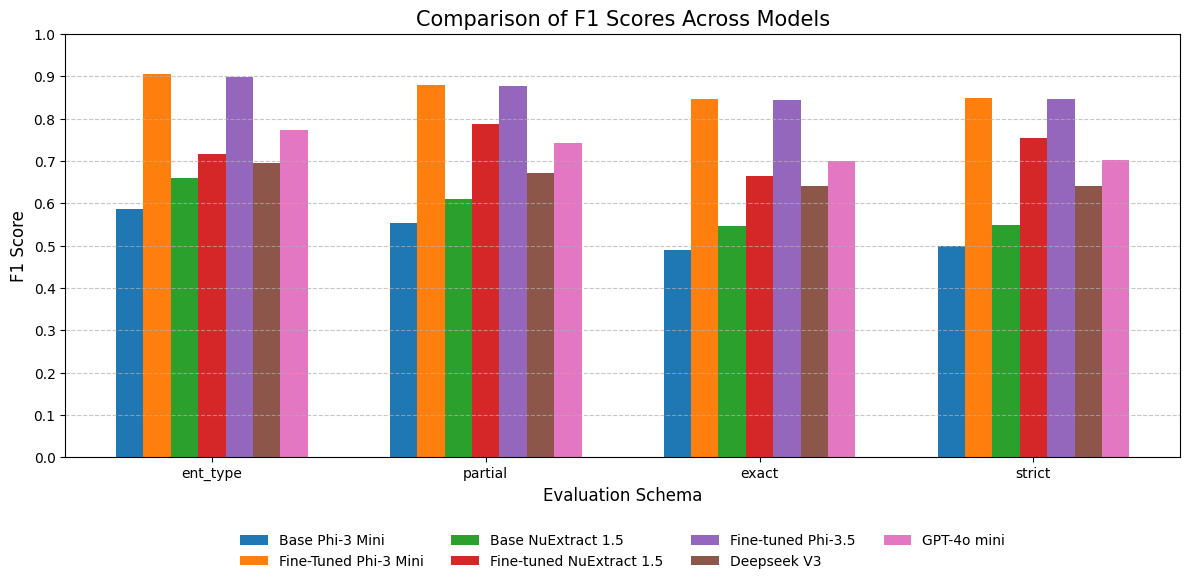

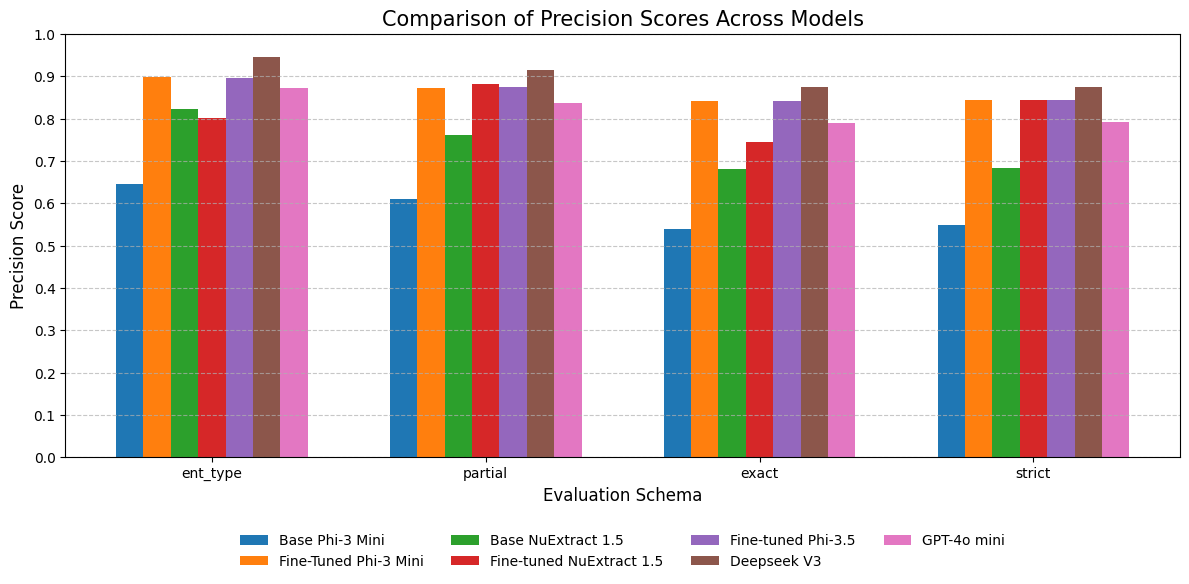

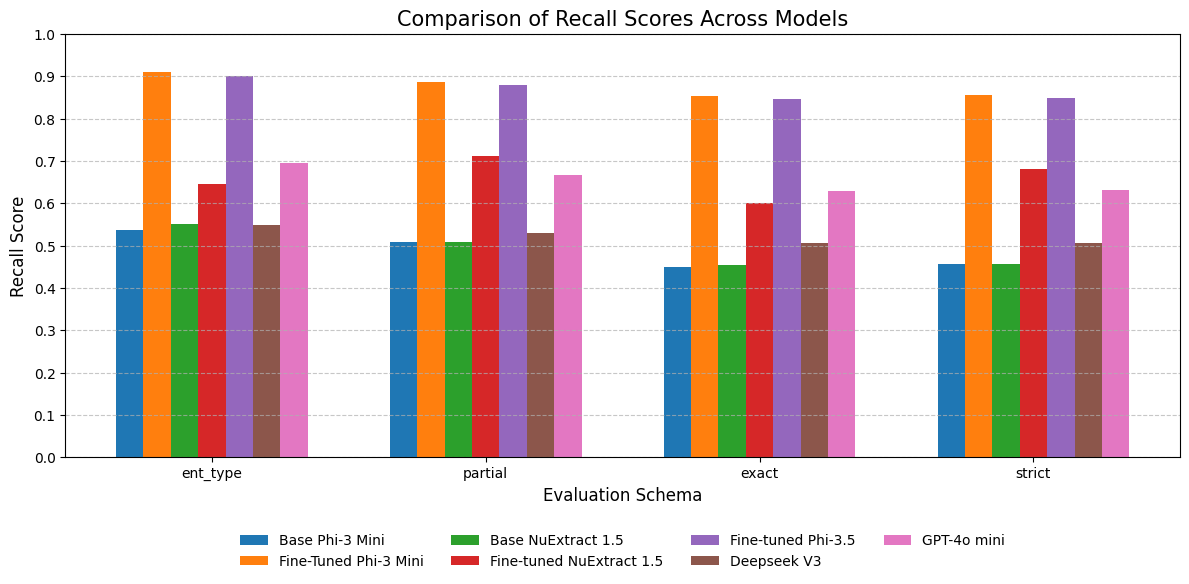

In [65]:
plot_for_schema("f1")
plot_for_schema("precision")
plot_for_schema("recall")

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_for_metrics(_base_results=base_results,
                     _finetuned_results=finetuned_results,
                     _nuextract_results=nuextract_results,
                     _nuextract_ft_results=nuextract_ft_results,
                     _phi35results=phi35_results,
                     _deepseek_results=deepseek_results,
                     _openai_results=openai_results):

    # Metrics to plot
    metrics = ["f1", "precision", "recall"]

    # Prepare data for "strict" only
    data = {
        "Metric": metrics,
        "Base Model": [_base_results["strict"][m] for m in metrics],
        "Fine-Tuned Model": [_finetuned_results["strict"][m] for m in metrics],
        "NuExtract Model": [_nuextract_results["strict"][m] for m in metrics],
        "Fine-tuned NuExtract Model": [_nuextract_ft_results["strict"][m] for m in metrics],
        "Fine-tuned Phi 3.5": [_phi35results["strict"][m] for m in metrics],
        "Deepseek V3": [_deepseek_results["strict"][m] for m in metrics],
        "GPT-4o mini": [_openai_results["strict"][m] for m in metrics],
    }

    df = pd.DataFrame(data)

    fig, ax = plt.subplots(figsize=(12, 6))

    x = np.arange(len(df["Metric"]))  # label locations
    width = 0.1

    # Plot bars
    ax.bar(x - 3*width, df["Base Model"], width, label="Base Phi-3 Mini")
    ax.bar(x - 2*width, df["Fine-Tuned Model"], width, label="Fine-Tuned Phi-3 Mini")
    ax.bar(x - width, df["NuExtract Model"], width, label="Base NuExtract 1.5")
    ax.bar(x, df["Fine-tuned NuExtract Model"], width, label="Fine-tuned NuExtract 1.5")
    ax.bar(x + width, df["Fine-tuned Phi 3.5"], width, label="Fine-tuned Phi-3.5")
    ax.bar(x + 2*width, df["Deepseek V3"], width, label="Deepseek V3")
    ax.bar(x + 3*width, df["GPT-4o mini"], width, label="GPT-4o mini")

    ax.set_xlabel("Metric", fontsize=12)
    ax.set_ylabel("Score", fontsize=12)
    ax.set_title("Strict Evaluation: Comparison of Precision, Recall, and F1", fontsize=15)
    ax.set_xticks(x)
    ax.set_yticks(np.arange(0, 1.1, 0.1))
    ax.set_xticklabels(df["Metric"])
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Legend below chart
    ax.legend(
        loc='upper center',
        bbox_to_anchor=(0.5, -0.15),
        ncol=4,
        frameon=False
    )

    plt.tight_layout()
    plt.show()


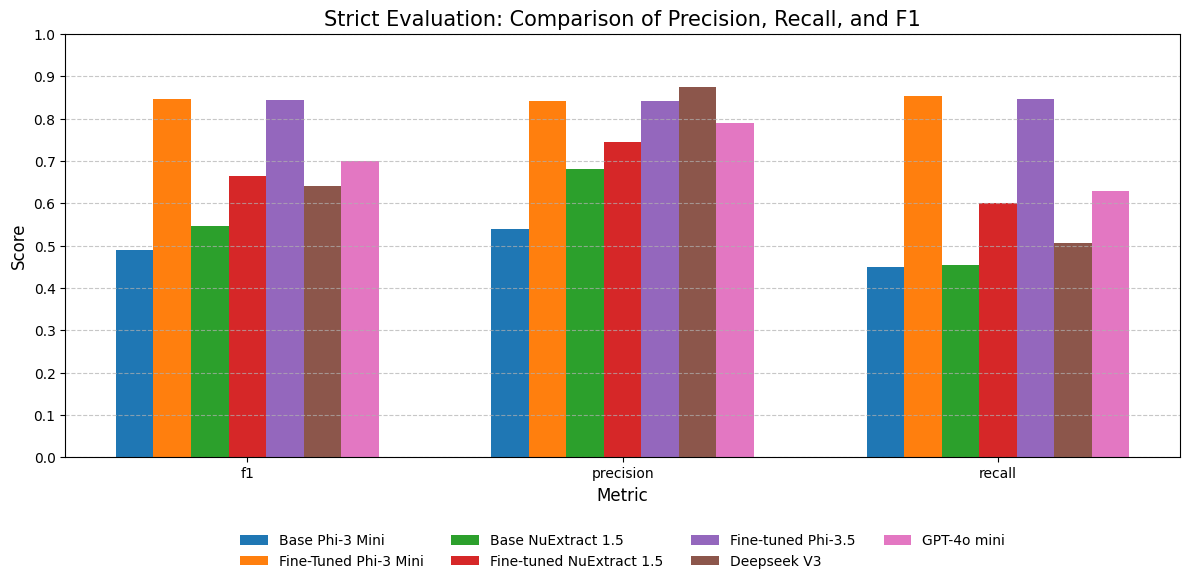

In [67]:
plot_for_metrics()

#### Evaluating only valid responses

In [63]:
evaluator = Evaluator(cleaned_true_responses, cleaned_base_responses, tags=['Disease', 'Chemical'])
cleaned_base_results = evaluator.evaluate()[0]
evaluator = Evaluator(cleaned_true_responses, cleaned_finetuned_responses, tags=['Disease', 'Chemical'])
cleaned_finetuned_results = evaluator.evaluate()[0]
evaluator = Evaluator(cleaned_true_responses, cleaned_openai_responses, tags=['Disease', 'Chemical'])
cleaned_openai_results = evaluator.evaluate()[0]
evaluator = Evaluator(cleaned_true_responses, cleaned_deepseek_responses, tags=['Disease', 'Chemical'])
cleaned_deepseek_results = evaluator.evaluate()[0]

In [64]:
# Prepare data in the desired format
data = []

# Iterate over each model and each metric type within the model
for model_name, model_data in zip(
    ["Base", "Fine-tuned", "DeepSeek", "OpenAI"],
    [cleaned_base_results, cleaned_finetuned_results, cleaned_deepseek_results, cleaned_openai_results]
):
    for metric, values in model_data.items():
        row = [model_name, metric] + list(values.values())
        data.append(row)

columns = ["Model", "Schema"] + list(base_results["ent_type"].keys())

df = pd.DataFrame(data, columns=columns)
# improve readability
df.set_index(["Model", "Schema"], inplace=True)
df[["precision", "recall", "f1"]] = df[["precision", "recall", "f1"]].round(3)
# misleading for our purpose
df.drop(columns=['possible', 'actual'], inplace=True)
df

correct  incorrect  partial  missed  spurious  precision  \
Model      Schema                                                               
Base       ent_type     4403        157        0    1439      1945      0.677   
           partial      3765          0      795    1439      1945      0.640   
           strict       3707        853        0    1439      1945      0.570   
           exact        3765        795        0    1439      1945      0.579   
Fine-tuned ent_type     5529         38        0     421       529      0.907   
           partial      5208          0      359     421       529      0.884   
           strict       5193        374        0     421       529      0.852   
           exact        5208        359        0     421       529      0.854   
DeepSeek   ent_type     3508         28        0    2443       170      0.947   
           partial      3251          0      285    2443       170      0.916   
           strict       3248        288        0    2443       170      0.876   
           exact        3251        285        0    2443       170      0.877   
OpenAI     ent_type     4333         34        0    1612       506      0.889   
           partial      3949          0      418    1612       506      0.853   
           strict       3942        425        0    1612       506      0.809   
           exact        3949        418        0    1612       506      0.810   

                     recall     f1  
Model      Schema                   
Base       ent_type   0.734  0.704  
           partial    0.694  0.666  
           strict     0.618  0.593  
           exact      0.628  0.602  
Fine-tuned ent_type   0.923  0.915  
           partial    0.900  0.892  
           strict     0.867  0.859  
           exact      0.870  0.862  
DeepSeek   ent_type   0.587  0.724  
           partial    0.568  0.701  
           strict     0.543  0.671  
           exact      0.544  0.671  
OpenAI     ent_type   0.725  0.799  
           partial    0.695  0.766  
           strict     0.659  0.727  
           exact      0.660  0.728

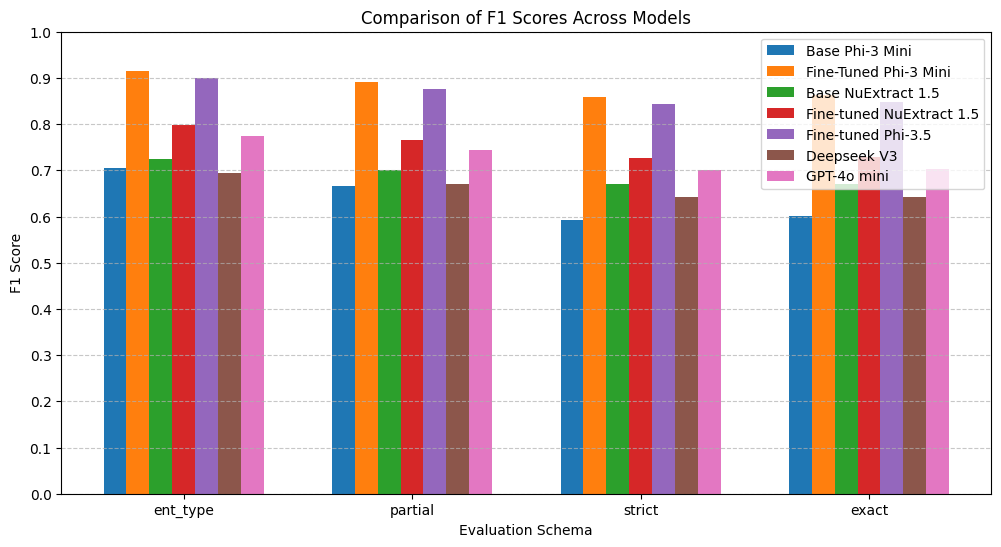

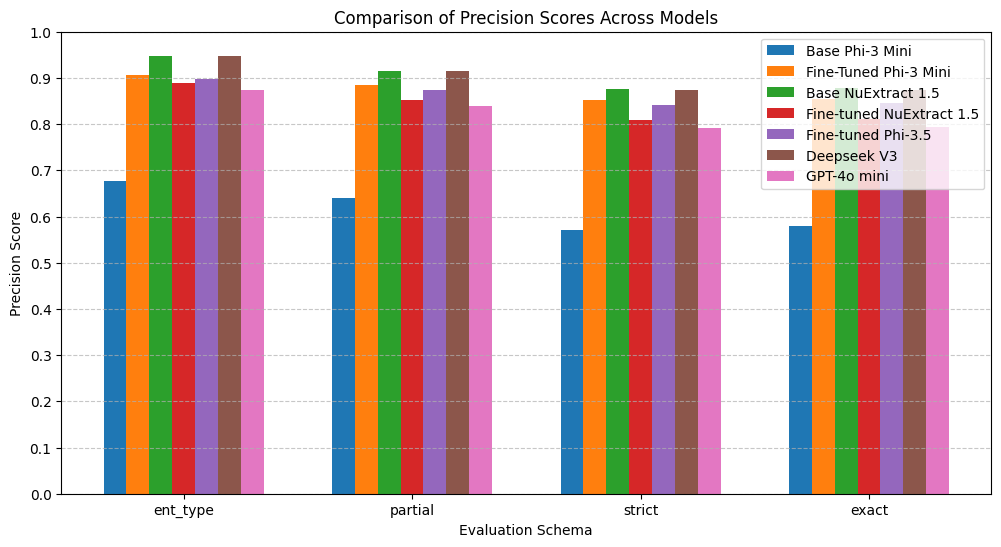

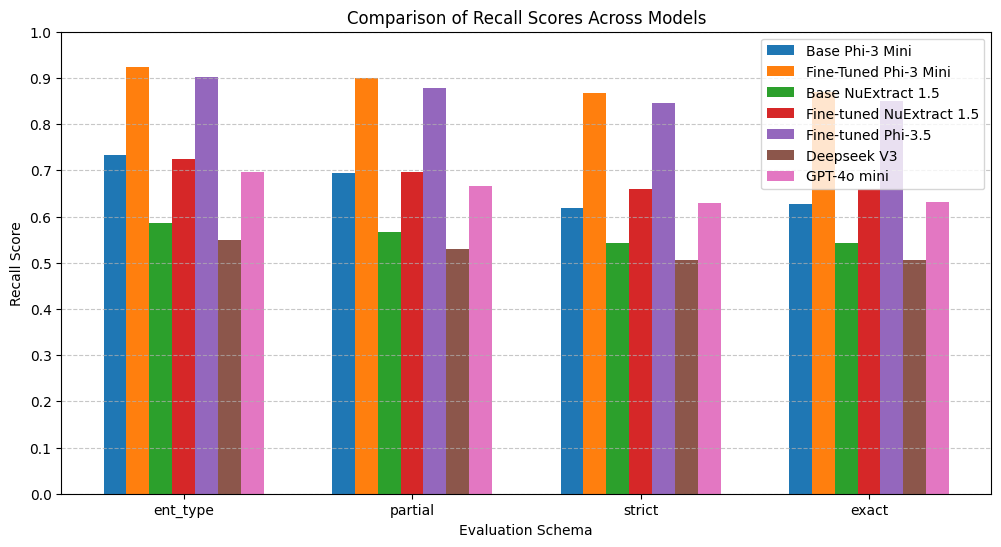

In [65]:
plot_for_schema("f1", cleaned_base_results, cleaned_finetuned_results, cleaned_deepseek_results, cleaned_openai_results)
plot_for_schema("precision", cleaned_base_results, cleaned_finetuned_results, cleaned_deepseek_results, cleaned_openai_results)
plot_for_schema("recall", cleaned_base_results, cleaned_finetuned_results, cleaned_deepseek_results, cleaned_openai_results)

#### Storing the results

In [39]:
with open("../assets/evaluation_results/base_results.json", "w") as file:
    json.dump(base_results, file)
with open("../assets/evaluation_results/finetuned_results.json", "w") as file:
    json.dump(finetuned_results, file)
with open("../assets/evaluation_results/nuextract_results.json", "w") as file:
    json.dump(nuextract_results, file)
with open("../assets/evaluation_results/nuextract_ft_results.json", "w") as file:
    json.dump(nuextract_ft_results, file)
with open("../assets/evaluation_results/openai_results.json", "w") as file:
    json.dump(openai_results, file)
with open("../assets/evaluation_results/deepseek_results.json", "w") as file:
    json.dump(deepseek_results, file)


### InterpretEval evaluation

In [ ]:
interpret_eval_base = prodigy_to_interpreteval(pred_responses_base)
interpret_eval_openai = prodigy_to_interpreteval(pred_responses_openai)
interpret_eval_finetuned = prodigy_to_interpreteval(pred_responses_finetuned)